In [17]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotnine

from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.feature_selection import VarianceThreshold
import math
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller 


# Data preprocessing

In [159]:
df = pd.read_csv('SWaT_Dataset.csv')
print("Data size:", df.shape) # print data size

Data size: (449919, 53)


In [160]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.rename(columns = {'Timestamp':'Date'}, inplace = True)

In [161]:
df.head(-5)

,Date,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449909,2016-02-01 14:59:50,2.633956,516.8018,2,2,1,168.0979,8.642528,301.8457,2.462051,...,2,1,251.3779,0.945119,189.1182,0.000000,1,1,1,Normal
449910,2016-02-01 14:59:51,2.626909,516.9588,2,2,1,168.0979,8.642528,301.8457,2.460898,...,2,1,251.3779,0.945119,189.1182,0.000000,1,1,1,Normal
449911,2016-02-01 14:59:52,2.616340,517.4691,2,2,1,168.0979,8.642528,301.9226,2.460770,...,2,1,251.3779,0.945119,189.1182,0.000000,1,1,1,Normal
449912,2016-02-01 14:59:53,2.606091,518.1757,2,2,1,168.0979,8.639965,301.9226,2.459488,...,2,1,251.3779,0.945119,189.1182,0.000000,1,1,1,Normal


In [162]:
df.duplicated().sum() # check the duplicates

0

In [163]:
df.isnull().sum()/len(df)*100

Date             0.0
FIT101           0.0
LIT101           0.0
 MV101           0.0
P101             0.0
P102             0.0
 AIT201          0.0
AIT202           0.0
AIT203           0.0
FIT201           0.0
 MV201           0.0
 P201            0.0
 P202            0.0
P203             0.0
 P204            0.0
P205             0.0
P206             0.0
DPIT301          0.0
FIT301           0.0
LIT301           0.0
MV301            0.0
MV302            0.0
 MV303           0.0
MV304            0.0
P301             0.0
P302             0.0
AIT401           0.0
AIT402           0.0
FIT401           0.0
LIT401           0.0
P401             0.0
P402             0.0
P403             0.0
P404             0.0
UV401            0.0
AIT501           0.0
AIT502           0.0
AIT503           0.0
AIT504           0.0
FIT501           0.0
FIT502           0.0
FIT503           0.0
FIT504           0.0
P501             0.0
P502             0.0
PIT501           0.0
PIT502           0.0
PIT503       

Drop columns with only one distinct value

In [164]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

In [165]:
df.shape

(449919, 46)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 46 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           449919 non-null  datetime64[ns]
 1   FIT101         449919 non-null  float64       
 2   LIT101         449919 non-null  float64       
 3    MV101         449919 non-null  int64         
 4   P101           449919 non-null  int64         
 5   P102           449919 non-null  int64         
 6    AIT201        449919 non-null  float64       
 7   AIT202         449919 non-null  float64       
 8   AIT203         449919 non-null  float64       
 9   FIT201         449919 non-null  float64       
 10   MV201         449919 non-null  int64         
 11   P201          449919 non-null  int64         
 12  P203           449919 non-null  int64         
 13   P204          449919 non-null  int64         
 14  P205           449919 non-null  int64         
 15  

# Data preperation VAR model

In [172]:
# create dff copy of df because we'll do some modification on datafram for VAR model
dff = df
dff=dff.iloc[50000:250000,:]
target1= dff["Normal/Attack"]

#create df copy with only categorical data
Df_cat  = dff.loc[:, df.nunique() < 4]
Df_cat = Df_cat[Df_cat_columns]

#Data normalization
Df_pca=dff.drop(columns=["Date", "Normal/Attack"])
df_pca_copy = Df_pca.copy()
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_pca_copy)
df_pca_copy = pd.DataFrame(x_scaled, index=df_pca_copy.index, columns=df_pca_copy.columns)


In [173]:
df_pca_copy.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT501,FIT502,FIT503,FIT504,P501,PIT501,PIT502,PIT503,FIT601,P602
50000,0.0,0.991589,0.5,0.0,0.0,0.883609,0.290805,0.281414,0.0,0.5,...,0.988379,0.943722,0.985325,0.976161,1.0,0.973416,0.473684,0.971081,0.000037,0.0
50001,0.0,0.990255,0.5,0.0,0.0,0.883609,0.290805,0.281414,0.0,0.5,...,0.988379,0.947492,0.985325,0.976161,1.0,0.974072,0.473684,0.971081,0.000037,0.0
50002,0.0,0.990768,0.5,0.0,0.0,0.883609,0.290805,0.281414,0.0,0.5,...,0.988379,0.950980,0.985325,0.976161,1.0,0.974072,0.473684,0.971081,0.000037,0.0
50003,0.0,0.990768,0.5,0.0,0.0,0.883609,0.290805,0.281414,0.0,0.5,...,0.989329,0.950980,0.985325,0.976161,1.0,0.974072,0.473684,0.971081,0.000037,0.0
50004,0.0,0.991076,0.5,0.0,0.0,0.883609,0.296552,0.281414,0.0,0.5,...,0.989768,0.962764,0.986706,0.981504,1.0,0.974072,0.552632,0.971081,0.000037,0.0


Principal component Analysis

In [177]:
# Create a PCA object with n_components=10
pca = PCA(n_components=10)

# Fit the PCA model to the data and transform the data
# using the fitted model
reduced_data = pca.fit_transform(df_pca_copy)

In [178]:
data=pd.DataFrame(reduced_data)
dff['Date'].values

array(['2015-12-28T23:53:20.000000000', '2015-12-28T23:53:21.000000000',
       '2015-12-28T23:53:22.000000000', ...,
       '2015-12-31T07:26:37.000000000', '2015-12-31T07:26:38.000000000',
       '2015-12-31T07:26:39.000000000'], dtype='datetime64[ns]')

In [179]:
data['Time']=dff['Date'].values

In [180]:
data=data.set_index('Time')

In [181]:
data.head()

,0,1,2,3,4,5,6,7,8,9
Time,,,,,,,,,,
2015-12-28 23:53:20,0.651929,-1.104725,-1.038653,-0.145060,-0.408606,0.068918,0.200201,-0.029613,-0.052283,0.048368
2015-12-28 23:53:21,0.650837,-1.105281,-1.038620,-0.145163,-0.408411,0.068914,0.200638,-0.028586,-0.052743,0.048785
2015-12-28 23:53:22,0.650340,-1.105757,-1.039023,-0.144944,-0.408264,0.068892,0.200699,-0.028828,-0.052172,0.048654
2015-12-28 23:53:23,0.650205,-1.105641,-1.039477,-0.144934,-0.408225,0.069039,0.200620,-0.028471,-0.051526,0.048613
2015-12-28 23:53:24,0.637777,-1.119641,-1.040857,-0.139725,-0.404100,0.069171,0.125849,-0.031547,-0.058579,0.050948


# Data preperation for LSTM and Isolation Forest

Forward features selection

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.ensemble import RandomForestClassifier

df_ = df[400000:]
X = df_.drop(['Date', 'Normal/Attack'], axis=1)
y = df_['Normal/Attack']

sfs = SFS(
RandomForestClassifier(),
k_features = 15,
forward = True,
floating = False,
verbose= 2,
scoring= "accuracy").fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:  4.6min finished

[2022-12-13 22:25:51] Features: 1/15 -- score: 0.9607571112076426[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:  9.6min finished

[2022-12-13 22:35:28] Features: 2/15 -- score: 0.9662457026303691[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:  7.1min finished

[2022-12-13 22:42:34] Features: 3/15 -- score: 0.969190368016654[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [48]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)

['FIT101', ' MV101', 'P101', 'P102', ' MV201', 'P203', ' P204', 'P205', 'P206', 'LIT301', 'P402', 'P403', 'UV401', 'FIT502', 'P501']


In [49]:
feat_names.append('Date')
feat_names.append('Normal/Attack')
df = df [feat_names]

In [42]:
df.shape #after

(449919, 17)

In [43]:
df.head()

,Date,FIT101,MV101,P101,P102,MV201,P203,P204,P205,P206,LIT301,P402,P403,UV401,FIT502,P501,Normal/Attack
0,2015-12-28 10:00:00,2.427057,2,2,1,2,2,1,2,1,956.1651,2,1,2,1.279621,2,Normal
1,2015-12-28 10:00:01,2.446274,2,2,1,2,2,1,2,1,956.1651,2,1,2,1.297554,2,Normal
2,2015-12-28 10:00:02,2.489191,2,2,1,2,2,1,2,1,956.4855,2,1,2,1.293967,2,Normal
3,2015-12-28 10:00:03,2.534350,2,2,1,2,2,1,2,1,956.8060,2,1,2,1.281158,2,Normal
4,2015-12-28 10:00:04,2.569260,2,2,1,2,2,1,2,1,957.0864,2,1,2,1.281158,2,Normal


Numerical and Categorical columns :

In [320]:
df.nunique()

Date             449919
FIT101             2788
 MV101                3
P101                  2
P102                  2
 MV201                3
P203                  2
 P204                 2
P205                  2
P206                  2
LIT301             7274
P402                  2
P403                  2
UV401                 2
FIT502             1199
P501                  2
Normal/Attack         3
dtype: int64

In [321]:
num_col = ['FIT101','LIT301','FIT502']

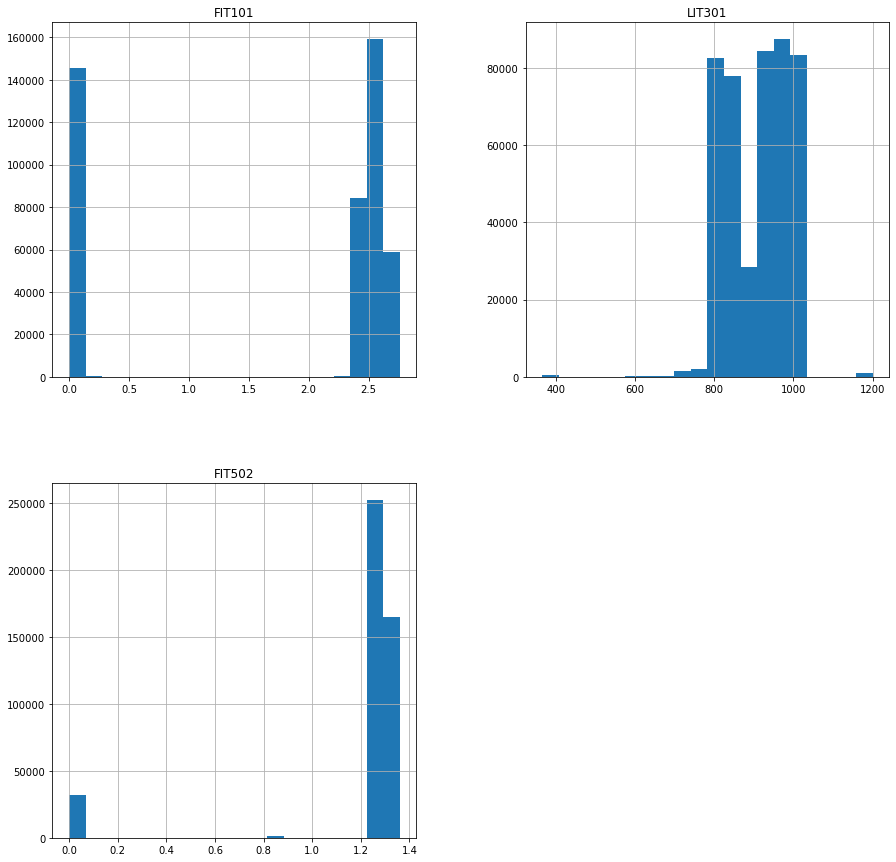

In [322]:
df[num_col].hist(bins=20,figsize=(15, 15))
plt.show()

In [323]:
cat_col = [" MV101","P101","P102"," MV201","P203"," P204","P205","P206","P402","P403","P501"]

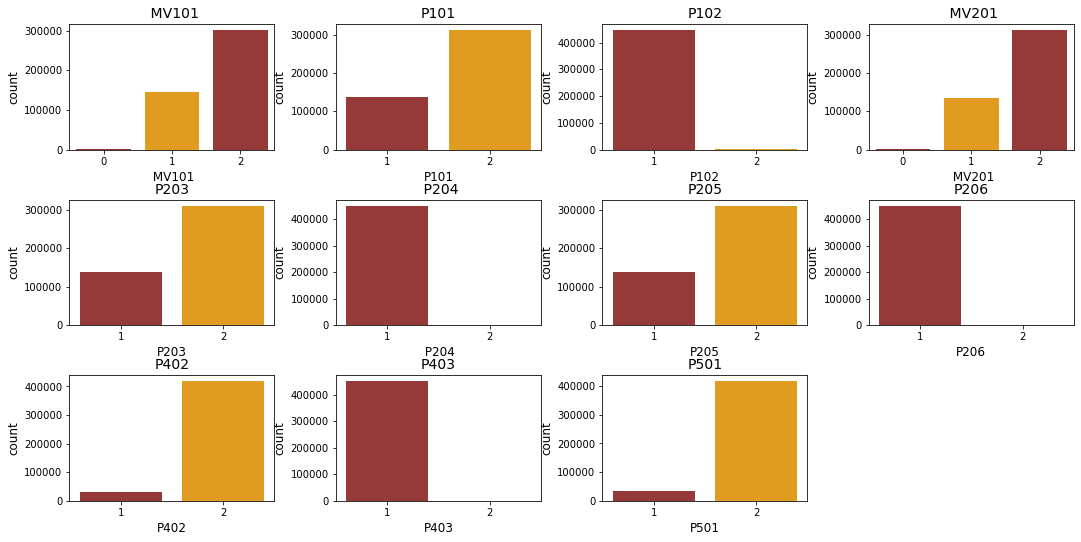

In [324]:
plt.figure(figsize=(18, 12))
for i, var in enumerate(cat_col):
    plt.subplot(4, 4, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, palette = ['brown', "orange"])

In [325]:
# One-Hot Encoding to Categorical features
one_hot_encoded_data = pd.get_dummies(df,columns=cat_col)
one_hot_encoded_data.head()

,Date,FIT101,LIT301,UV401,FIT502,Normal/Attack,MV101_0,MV101_1,MV101_2,P101_1,...,P205_1,P205_2,P206_1,P206_2,P402_1,P402_2,P403_1,P403_2,P501_1,P501_2
0,2015-12-28 10:00:00,2.427057,956.1651,2,1.279621,Normal,0,0,1,0,...,0,1,1,0,0,1,1,0,0,1
1,2015-12-28 10:00:01,2.446274,956.1651,2,1.297554,Normal,0,0,1,0,...,0,1,1,0,0,1,1,0,0,1
2,2015-12-28 10:00:02,2.489191,956.4855,2,1.293967,Normal,0,0,1,0,...,0,1,1,0,0,1,1,0,0,1
3,2015-12-28 10:00:03,2.534350,956.8060,2,1.281158,Normal,0,0,1,0,...,0,1,1,0,0,1,1,0,0,1
4,2015-12-28 10:00:04,2.569260,957.0864,2,1.281158,Normal,0,0,1,0,...,0,1,1,0,0,1,1,0,0,1


In [326]:
processed_df = one_hot_encoded_data

# VAR model

In [182]:
def test_stationarity(data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(data, autolag='AIC')
    else:
        adf_test = adfuller(data[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [183]:
adf_test_results = {
    col: test_stationarity(data, col)
    for col in data.columns
}
adf_test_results

{0: 'Stationary',
 1: 'Stationary',
 2: 'Stationary',
 3: 'Stationary',
 4: 'Stationary',
 5: 'Stationary',
 6: 'Non-Stationary',
 7: 'Stationary',
 8: 'Stationary',
 9: 'Stationary'}

In [204]:
def differencing(data, column, order):
    differenced_data = data[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data

data[6] = differencing(data, 6, 1)

In [205]:
adf_test_results =test_stationarity(data, 6)

adf_test_results

'Stationary'

In [206]:
data.head()

,0,1,2,3,4,5,6,7,8,9
Time,,,,,,,,,,
2015-12-28 23:53:20,0.651929,-1.104725,-1.038653,-0.145060,-0.408606,0.068918,4.120535e-12,-0.029613,-0.052283,0.048368
2015-12-28 23:53:21,0.650837,-1.105281,-1.038620,-0.145163,-0.408411,0.068914,4.374191e-04,-0.028586,-0.052743,0.048785
2015-12-28 23:53:22,0.650340,-1.105757,-1.039023,-0.144944,-0.408264,0.068892,-3.746005e-04,-0.028828,-0.052172,0.048654
2015-12-28 23:53:23,0.650205,-1.105641,-1.039477,-0.144934,-0.408225,0.069039,-1.410798e-04,-0.028471,-0.051526,0.048613
2015-12-28 23:53:24,0.637777,-1.119641,-1.040857,-0.139725,-0.404100,0.069171,-7.469149e-02,-0.031547,-0.058579,0.050948


In [207]:
from statsmodels.tsa.api import VAR
max_lag = 6
var_model = VAR(data)
# select the best lag order
lag_results = var_model.select_order(max_lag)
print(lag_results.aic)

6


In [258]:
def find_anomalies(squared_errors):
    threshold = 0.0003
    print(threshold)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold
var = VAR(data)
var_fitresults = var.fit(lag_results.aic)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors)

0.0003


In [259]:
predictions.value_counts()

0    179470
1     20524
dtype: int64

In [260]:
res = data.iloc[6:, :]
res['Predictions'] = predictions.values
res['Predictions'].value_counts()

0    179470
1     20524
Name: Predictions, dtype: int64

In [261]:
target1.replace({"Normal": 0,"Attack":1,"A ttack":1}, inplace=True)
target1[2:].value_counts()

0    170535
1     29463
Name: Normal/Attack, dtype: int64

In [262]:
res['Real'] = target1[6:].values
res['Real'].value_counts()

0    170531
1     29463
Name: Real, dtype: int64

In [263]:
predicted = res['Predictions']
actual = res['Real']

correct_pred = 0

for i in range(len(predicted)):
    if -predicted[i] == actual[i]:
        correct_pred = correct_pred +1
        
score = correct_pred / len(actual)

print("Accuracy is:",score)

Accuracy is: 0.7555876676300289


In [264]:
MSE = np.square(np.subtract(actual,predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.4887557329228926


# Isolation Forest


Data normalization

In [166]:
Date_column = df['Date'] #make a copy of Date column to use later
df_copy = df
df_IF = processed_df
df_IF = df_IF.drop('Date', axis=1)
df_IF = df_IF.drop('Normal/Attack', axis=1) 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_IF)
df_IF = pd.DataFrame(x_scaled, index=df_IF.index, columns=df_IF.columns)

In [167]:
df_IF.head()

,FIT101,LIT301,UV401,FIT502,MV101_0,MV101_1,MV101_2,P101_1,P101_2,P102_1,...,P205_1,P205_2,P206_1,P206_2,P402_1,P402_2,P403_1,P403_2,P501_1,P501_2
0,0.879322,0.707350,1.0,0.940678,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.886285,0.707350,1.0,0.953861,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.901833,0.707733,1.0,0.951224,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.918195,0.708116,1.0,0.941808,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.930842,0.708451,1.0,0.941808,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [168]:
#Building the model

random_state = np.random.RandomState(42)

model=IsolationForest(n_estimators=15,max_samples=20,max_features=20,contamination=0.01,bootstrap=True,n_jobs=5,random_state=random_state)

model.fit(df_IF)

print(model.get_params())

{'bootstrap': True, 'contamination': 0.01, 'max_features': 20, 'max_samples': 20, 'n_estimators': 15, 'n_jobs': 1, 'random_state': RandomState(MT19937) at 0x17A1EBCE540, 'verbose': 0, 'warm_start': False}


In [169]:
md = model.decision_function(df_IF)
mp = model.predict(df_IF)

df_IF['scores'] = md
df_IF['Normal/Attack'] = mp
df_IF['Normal/Attack'] = df_IF['Normal/Attack'].replace({1: 'Normal', -1: 'Attack'})

In [170]:
#predected
df_IF['Normal/Attack'].value_counts()

Normal    446302
Attack      3617
Name: Normal/Attack, dtype: int64

In [171]:
#original data with true labels
processed_df['Normal/Attack'].value_counts()

Normal     395298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64

In [172]:
predicted_IF = df_IF['Normal/Attack'].replace({'Normal': 0, 'Attack': 1})
actual_df = one_hot_encoded_data['Normal/Attack'].replace({'Normal': 0, 'Attack': 1})

correct_pred = 0

for i in range(len(predicted_IF)):
    if -predicted_IF[i] == actual_df[i]:
        correct_pred = correct_pred +1
        
score = correct_pred / len(actual_df)

print("Accuracy is:",score)

Accuracy is: 0.8778735727986593


# Long Short-Term Memory (LSTM) Autoencoder

In [327]:
DF_LSTM = one_hot_encoded_data
Date_column = DF_LSTM['Date'] #make a copy of Date column to use later
DF_LSTM.index = Date_column
DF_LSTM = DF_LSTM.drop('Date', axis=1) #drop Date columns because we will use it as an index 
DF_LSTM = DF_LSTM.drop('Normal/Attack', axis=1) 
DF_LSTM = DF_LSTM.sort_index()

In [328]:
train = DF_LSTM['2015-12-28 10:00:00': '2016-01-18 14:59:50']
test = DF_LSTM['2016-01-18 14:59:51':]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (395919, 28)
Test dataset shape: (54000, 28)


In [329]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
import joblib
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [330]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (395919, 1, 28)
Test data shape: (54000, 1, 28)


In [331]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [332]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras import regularizers
from keras.models import Model

# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1, 28)]           0         
                                                                 
 lstm_44 (LSTM)              (None, 1, 16)             2880      
                                                                 
 lstm_45 (LSTM)              (None, 4)                 336       
                                                                 
 repeat_vector_6 (RepeatVect  (None, 1, 4)             0         
 or)                                                             
                                                                 
 lstm_46 (LSTM)              (None, 1, 4)              144       
                                                                 
 lstm_47 (LSTM)              (None, 1, 16)             1344      
                                                           

In [333]:
# fit the model to the data
nb_epochs = 30
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Epoch 1/30
37613/37613 [==============================] - 153s 4ms/step - loss: 0.0680 - val_loss: 0.0580
Epoch 2/30
37613/37613 [==============================] - 158s 4ms/step - loss: 0.0574 - val_loss: 0.0560
Epoch 3/30
37613/37613 [==============================] - 165s 4ms/step - loss: 0.0572 - val_loss: 0.0570
Epoch 4/30
37613/37613 [==============================] - 167s 4ms/step - loss: 0.0572 - val_loss: 0.0559
Epoch 5/30
37613/37613 [==============================] - 170s 5ms/step - loss: 0.0571 - val_loss: 0.0564
Epoch 6/30
37613/37613 [==============================] - 168s 4ms/step - loss: 0.0571 - val_loss: 0.0557
Epoch 7/30
37613/37613 [==============================] - 169s 4ms/step - loss: 0.0570 - val_loss: 0.0559
Epoch 8/30
37613/37613 [==============================] - 166s 4ms/step - loss: 0.0570 - val_loss: 0.0561
Epoch 9/30
37613/37613 [==============================] - 171s 5ms/step - loss: 0.0570 - val_loss: 0.0556
Epoch 10/30
37613/37613 [=====================

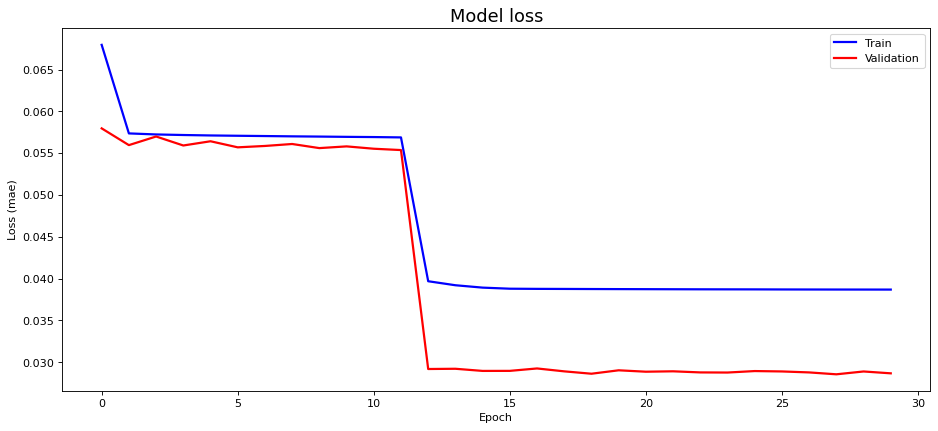

In [334]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

12373/12373 [==============================] - 26s 2ms/step


(0.0, 0.5)

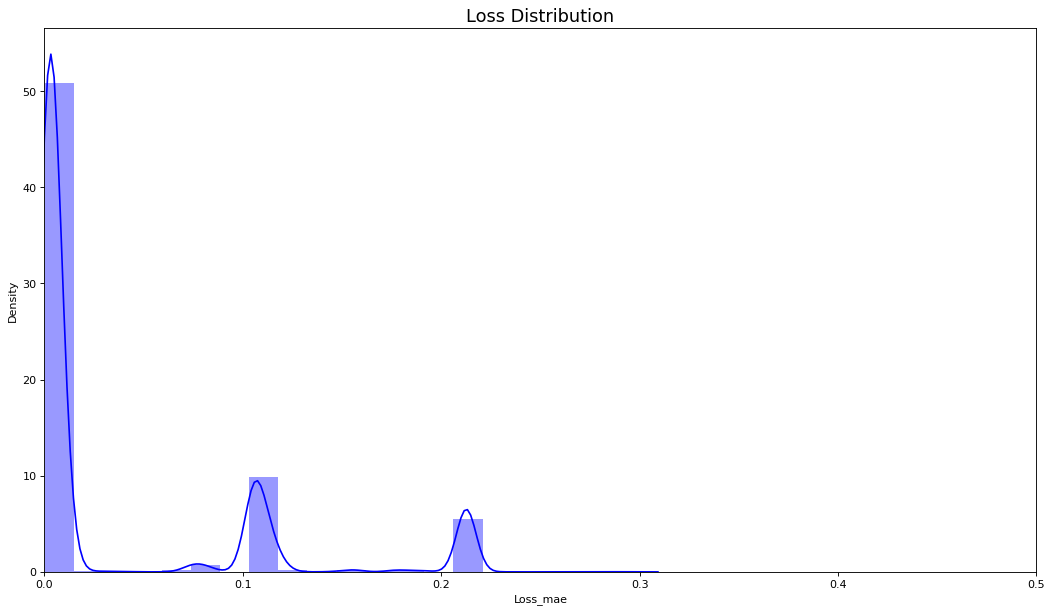

In [335]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.5])

In [398]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored_test = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored_test['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored_test['Threshold'] = 0.17
scored_test['Normal/Attack'] = scored_test['Loss_mae'] > scored_test['Threshold']
scored_test['Normal/Attack'] = scored_test['Normal/Attack'].replace({False: 'Normal', True: 'Attack'})
scored_test.head()

1688/1688 [==============================] - 3s 2ms/step


,Loss_mae,Threshold,Normal/Attack
Date,,,
2016-02-01 00:00:00,0.003536,0.17,Normal
2016-02-01 00:00:01,0.002963,0.17,Normal
2016-02-01 00:00:02,0.003175,0.17,Normal
2016-02-01 00:00:03,0.003602,0.17,Normal
2016-02-01 00:00:04,0.003694,0.17,Normal


In [399]:
scored_test['Normal/Attack'].value_counts()

Normal    53867
Attack      133
Name: Normal/Attack, dtype: int64

In [400]:
# calculate the same metrics for the training set 
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.17
scored_train['Normal/Attack'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored_train['Normal/Attack'] = scored_train['Normal/Attack'].replace({False: 'Normal', True: 'Attack'})

12373/12373 [==============================] - 23s 2ms/step


In [401]:
scored_train['Normal/Attack'].value_counts()

Normal    362201
Attack     33718
Name: Normal/Attack, dtype: int64

In [402]:
# merge all data in a single dataframe for plotting
scored = pd.concat([scored_train, scored_test])
scored['Normal/Attack'].value_counts()

Normal    416068
Attack     33851
Name: Normal/Attack, dtype: int64

In [403]:
#true labels from original df
one_hot_encoded_data['Normal/Attack'].value_counts()

Normal     395298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64

<AxesSubplot:xlabel='Date'>

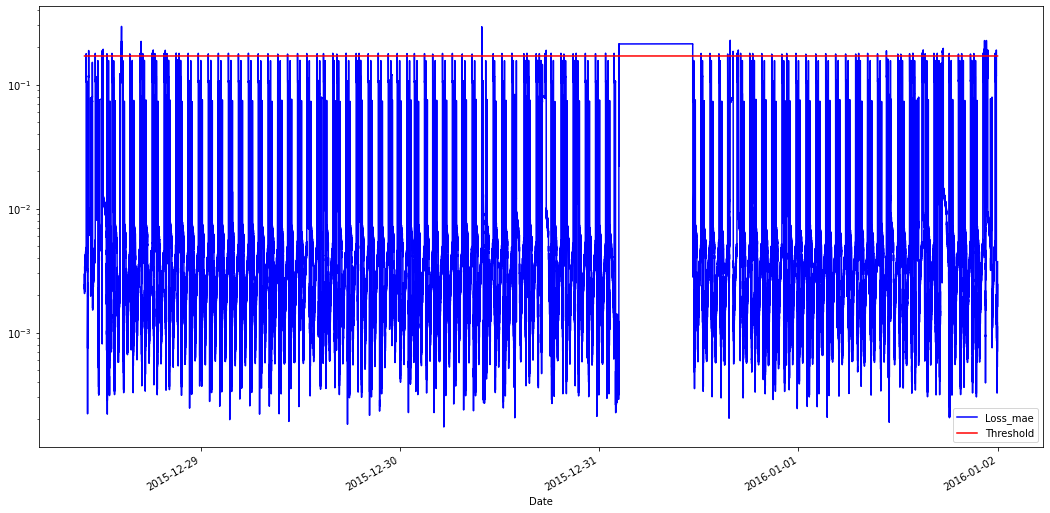

In [407]:
# plot results
#scored_test.plot(logy=True,  figsize=(18,9), color=['blue','red'])
scored_train.plot(logy=True,  figsize=(18,9), color=['blue','red'])

In [405]:
predicted = scored['Normal/Attack'].replace({'Normal': 0, 'Attack': 1}).values
actual = one_hot_encoded_data['Normal/Attack'].replace({'Normal': 0, 'Attack': 1, 'A ttack':1}).values

MSE = np.square(np.subtract(actual,predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.22643200101447064


In [406]:
correct_pred = 0

for i in range(len(predicted)):
    if -predicted[i] == actual[i]:
        correct_pred = correct_pred +1
        
score = correct_pred / len(actual)

print("Accuracy is:",score)

Accuracy is: 0.8760443546505038


# Results